In [1]:
import numpy as np
import mne
import scipy.io


In [2]:
#Importing the data
data = scipy.io.loadmat(r"C:\Users\Srajan Agarwal\EEG Assignment 1\5F-SubjectA-160408-5St-SGLHand-HFREQ.mat")
print(data.keys())
dat = list(data.items())
print(dat)

dict_keys(['__header__', '__version__', '__globals__', 'o'])
[('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Apr 11 10:53:04 2016'), ('__version__', '1.0'), ('__globals__', []), ('o', array([[(array(['201604081208.D091BB44'], dtype='<U21'), array(['NK-data import (auto)'], dtype='<U21'), array([[1000]], dtype=uint16), array([[3595000]]), array([[0],
               [0],
               [0],
               ...,
               [0],
               [0],
               [0]], dtype=uint8), array([[ -0.  ,  -0.  ,  -0.  , ...,  -0.  ,  -0.  ,  -0.  ],
               [ -0.  ,  -0.  ,  -0.  , ...,  -0.  ,  -0.  ,  -0.  ],
               [ -0.  ,  -0.  ,  -0.  , ...,  -0.  ,  -0.  ,  -0.  ],
               ...,
               [164.96, 148.05,  49.12, ...,  -0.68, -24.21,  -0.58],
               [167.98, 151.72,  50.  , ...,  -2.74, -27.11,  -0.58],
               [164.6 , 155.05,  51.02, ...,  -3.13, -29.22,  -0.59]]), array([[array(['Fp1'], dtype='<U3')],
               [a

In [3]:
nested_data = data['o']
print(nested_data.shape)
print(nested_data.dtype.names)

eeg_data = nested_data['data'][0,0]
eeg_data.shape

(1, 1)
('id', 'tag', 'sampFreq', 'nS', 'marker', 'data', 'chnames', 'binsuV')


(3595000, 22)

In [4]:

samples,channels = eeg_data.shape
nS = 1000  


n_trials = samples // nS


eeg_data_trimmed = eeg_data[:, :n_trials * nS]

X= eeg_data_trimmed.T.reshape(n_trials, nS, channels).transpose(0, 2, 1)  



In [5]:
# X = nested_data['data'][0,0]

In [6]:

Y = nested_data['marker'][0,0]
                   

In [7]:

nS = 1000  
samples = len(Y)  


n_trials = samples // nS  
remaining_samples = samples % nS  


Y_trimmed = Y[:n_trials * nS]


Y_trials= Y_trimmed.reshape(n_trials, nS)


if remaining_samples > 0:
    print(f"Excess samples not included: {remaining_samples} out of {samples} total samples.")


print(f"Marker data reshaped to: {Y_trials.shape}")


Marker data reshaped to: (3595, 1000)


In [8]:
Y= Y_trials

In [9]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5, 90, 91, 99], dtype=uint8)

In [10]:
print(X.shape)
print(Y.shape)

(3595, 22, 1000)
(3595, 1000)


In [11]:
X.ndim

3

In [12]:

labels = np.array([np.bincount(y_row.astype(int)).argmax() for y_row in Y]) 

In [13]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5, 90, 91, 99], dtype=int64)

In [14]:

labels.shape

(3595,)

In [15]:
data = np.rollaxis(X,0,1)
data.shape

(3595, 22, 1000)

In [16]:

ch_names = [str(item[0]) for sublist in nested_data['chnames'][0][0] for item in sublist]

print(ch_names)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'X5']


In [17]:
event_id = {
    'No raise' : 0,
    'thumb':1,
    'Index Finger' :2,
    'Middle Finger' :3,
    'Ring Finger':4,
    'pinkie finger':5,
    'Session break':90,
    'Experiment end':91,
    'Initial relaxation':99,
}

sfreq = nested_data['sampFreq'][0,0]

In [18]:
sfreq = 1000

In [19]:
n_chanels = len(data[1,:,1])

info = mne.create_info(ch_names =ch_names,
                       ch_types=['eeg']*n_chanels,
                       sfreq=sfreq)

info.set_montage('standard_1020', on_missing='ignore')  # Ignore missing channels


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1, A2, F7, F8, T3, ...
 chs: 22 EEG
 custom_ref_applied: False
 dig: 24 items (3 Cardinal, 21 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 1000.0 Hz
>

In [20]:
eventlength = Y.shape[0]
ev = [i for i in range(eventlength)]


In [21]:
events = np.column_stack((np.array(ev),
                          np.zeros(eventlength,dtype = 'int'),
                          np.array(labels)))

In [22]:
events

array([[   0,    0,    0],
       [   1,    0,    0],
       [   2,    0,    0],
       ...,
       [3592,    0,    0],
       [3593,    0,    0],
       [3594,    0,    0]], dtype=int64)

In [23]:
np.unique(events[:,2])

array([ 0,  1,  2,  3,  4,  5, 90, 91, 99], dtype=int64)

In [24]:
event_id

{'No raise': 0,
 'thumb': 1,
 'Index Finger': 2,
 'Middle Finger': 3,
 'Ring Finger': 4,
 'pinkie finger': 5,
 'Session break': 90,
 'Experiment end': 91,
 'Initial relaxation': 99}

In [25]:
tmin = 0

epochs = mne.EpochsArray(data,info,events,tmin,event_id)

Not setting metadata
3595 matching events found
No baseline correction applied
0 projection items activated


In [26]:
epochs

<EpochsArray | 3595 events (all good), 0 – 0.999 s (baseline off), ~603.4 MiB, data loaded,
 'No raise': 2180
 'thumb': 269
 'Index Finger': 228
 'Middle Finger': 264
 'Ring Finger': 241
 'pinkie finger': 232
 'Session break': 97
 'Experiment end': 79
 'Initial relaxation': 5>

In [27]:
epochs.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1, A2, F7, F8, T3, ...
 chs: 22 EEG
 custom_ref_applied: False
 dig: 24 items (3 Cardinal, 21 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 1000.0 Hz
>

In [28]:
import matplotlib.pyplot as plt

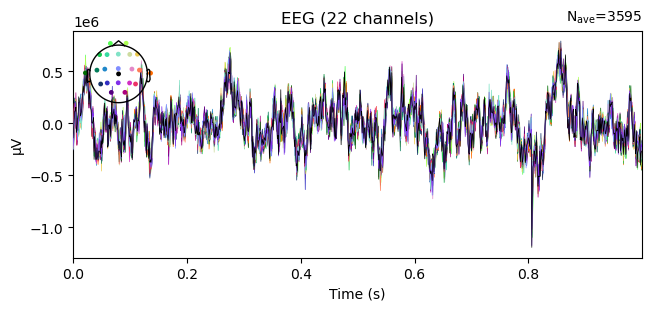

In [29]:

epochs.average().plot()
plt.show()

In [30]:
epochs.plot()

Using qt as 2D backend.


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


c:\Conda\envs\myenv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


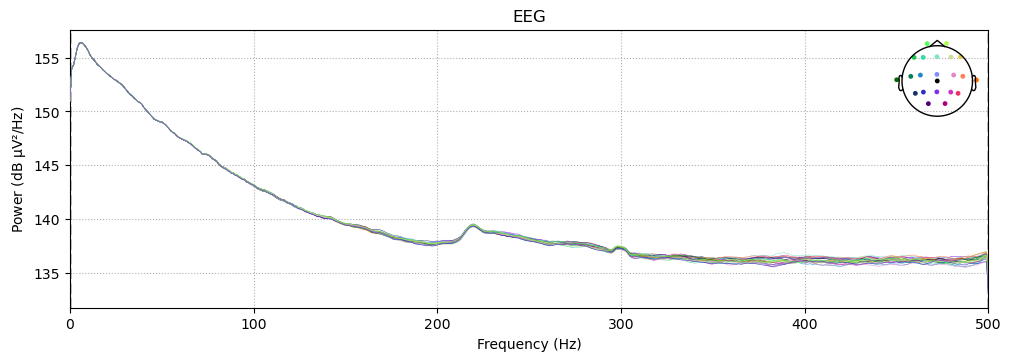

In [31]:
epochs.plot_psd()
plt.show()


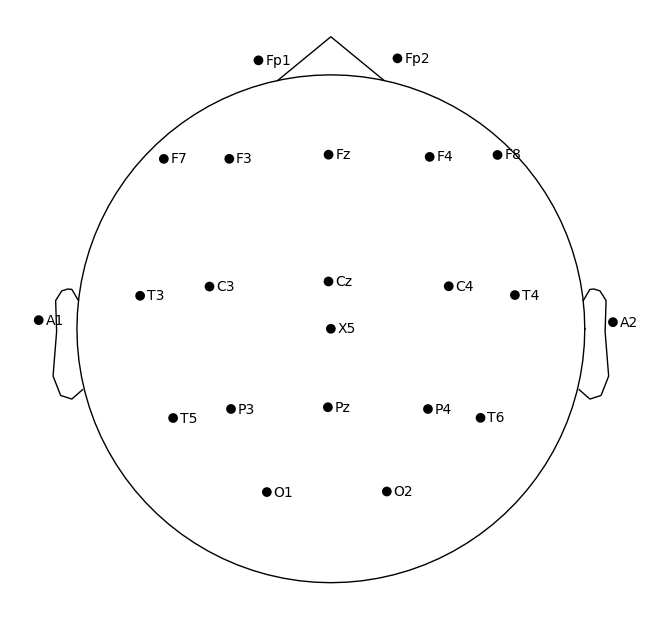

In [32]:
epochs.plot_sensors(show_names=True)
plt.show()

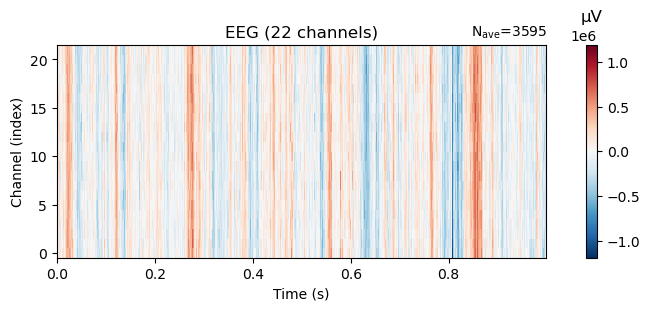

In [33]:
epochs.average().plot_image()
plt.show()

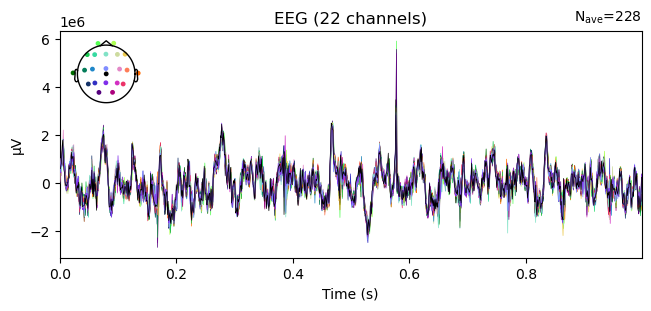

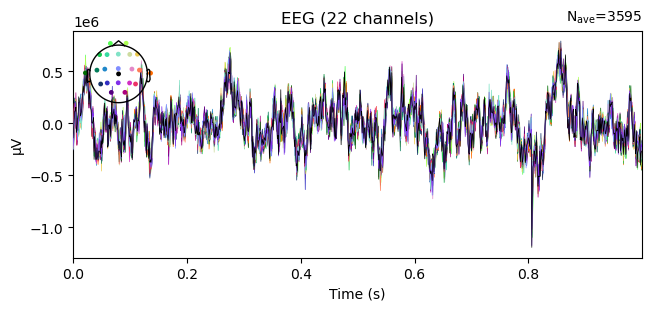

In [34]:
epochs['Index Finger'].average().plot()
epochs.average().plot()
plt.show()

In [35]:
print(epochs.get_data())

[[[-0.000e+00 -0.000e+00 -0.000e+00 ... -1.005e+01 -2.003e+01  9.450e+00]
  [-0.000e+00 -0.000e+00 -0.000e+00 ... -9.870e+00 -1.599e+01  1.145e+01]
  [-0.000e+00 -0.000e+00 -0.000e+00 ... -6.640e+00 -9.180e+00  9.520e+00]
  ...
  [-0.000e+00 -0.000e+00 -0.000e+00 ... -3.640e+00  5.640e+00  1.141e+01]
  [-0.000e+00 -0.000e+00 -0.000e+00 ... -1.201e+01  4.510e+00  7.140e+00]
  [-0.000e+00 -0.000e+00 -0.000e+00 ... -1.989e+01  5.170e+00  3.010e+00]]

 [[ 6.900e-01  1.112e+01  2.300e-01 ...  7.700e-01  4.930e+00 -4.200e+00]
  [ 3.900e-01  8.540e+00 -1.400e+00 ...  4.200e-01  1.590e+00 -4.690e+00]
  [ 5.700e-01  2.480e+00  2.910e+00 ...  1.350e+00 -2.010e+00 -3.230e+00]
  ...
  [ 8.620e+00  5.970e+00 -9.050e+00 ...  1.900e+00 -4.620e+00 -4.160e+00]
  [ 9.330e+00  4.740e+00 -4.900e+00 ...  3.000e-02 -3.920e+00 -3.090e+00]
  [ 1.032e+01  3.900e+00 -3.570e+00 ...  2.620e+00 -2.050e+00 -4.110e+00]]

 [[-4.190e+00 -3.240e+00 -9.500e-01 ...  4.380e+00  2.700e-01  1.500e-01]
  [-4.680e+00 -2.720e+

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE
from mne.decoding import Scaler
from mne.time_frequency import psd_array_multitaper as psd_multitaper

In [37]:


X = epochs.get_data()  
y = labels

def extract_features(X, sfreq):
    n_epochs, n_channels, _ = X.shape
    features = []
    for epoch in X:
        psd, freqs = psd_multitaper(epoch, sfreq=sfreq, fmin=0.1, fmax=50, verbose=False)
        features.append(psd.flatten())  
    return np.array(features)


sfreq = epochs.info['sfreq'] 
scaler = Scaler(epochs.info)  
X_scaled = scaler.fit_transform(X)
X_features = extract_features(X_scaled, sfreq)


smote = BorderlineSMOTE(k_neighbors=6, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_features, y)



In [38]:
X_resampled.shape

(17445, 1100)

In [39]:
X_resampled 

array([[2.75496451e+14, 6.89132153e+14, 1.14297848e+15, ...,
        1.04732152e+16, 1.03600280e+16, 9.98009477e+15],
       [4.21546466e+14, 7.35113031e+14, 8.11616220e+14, ...,
        6.76389227e+14, 5.80743142e+14, 5.91977884e+14],
       [1.39084195e+15, 1.33261029e+15, 1.28481818e+15, ...,
        1.54426188e+15, 1.33694776e+15, 1.39714858e+15],
       ...,
       [3.11119871e+14, 2.34394481e+14, 2.81049265e+14, ...,
        1.84376696e+14, 1.60467203e+14, 1.62323921e+14],
       [2.89989756e+14, 2.65317115e+14, 3.39766097e+14, ...,
        1.51697732e+14, 1.33111148e+14, 1.38851140e+14],
       [2.99063814e+14, 3.18991964e+14, 3.22634526e+14, ...,
        7.07664519e+13, 6.66443818e+13, 5.77126337e+13]])

In [40]:
y_resampled.shape

(17445,)

In [41]:
import seaborn as sns

Model: Random Forest
Accuracy: 0.9235
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.64      0.72       433
           1       0.92      0.95      0.94       449
           2       0.94      0.97      0.96       437
           3       0.92      0.94      0.93       432
           4       0.93      0.95      0.94       452
           5       0.93      0.95      0.94       422
          90       0.93      1.00      0.97       427
          91       0.96      0.99      0.98       434
          99       0.00      0.00      0.00         3

    accuracy                           0.92      3489
   macro avg       0.82      0.82      0.82      3489
weighted avg       0.92      0.92      0.92      3489



c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: SVM
Accuracy: 0.2666
Classification Report:               precision    recall  f1-score   support

           0       0.30      0.01      0.03       433
           1       0.51      0.05      0.10       449
           2       0.29      0.05      0.08       437
           3       0.15      0.04      0.06       432
           4       0.88      0.03      0.06       452
           5       0.67      0.00      0.01       422
          90       0.73      1.00      0.84       427
          91       0.16      0.97      0.27       434
          99       0.00      0.00      0.00         3

    accuracy                           0.27      3489
   macro avg       0.41      0.24      0.16      3489
weighted avg       0.46      0.27      0.18      3489



c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: KNN
Accuracy: 0.8593
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.16      0.26       433
           1       0.84      0.94      0.89       449
           2       0.84      0.96      0.90       437
           3       0.82      0.94      0.88       432
           4       0.86      0.94      0.90       452
           5       0.86      0.93      0.89       422
          90       0.92      1.00      0.96       427
          91       0.93      0.99      0.96       434
          99       0.00      0.00      0.00         3

    accuracy                           0.86      3489
   macro avg       0.75      0.76      0.74      3489
weighted avg       0.84      0.86      0.83      3489



c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\linear_mo

Model: Logistic Regression
Accuracy: 0.4428
Classification Report:               precision    recall  f1-score   support

           0       0.20      0.24      0.21       433
           1       0.36      0.32      0.34       449
           2       0.49      0.38      0.43       437
           3       0.34      0.26      0.30       432
           4       0.45      0.40      0.42       452
           5       0.45      0.33      0.38       422
          90       0.51      0.96      0.66       427
          91       0.76      0.66      0.71       434
          99       0.00      0.00      0.00         3

    accuracy                           0.44      3489
   macro avg       0.40      0.40      0.38      3489
weighted avg       0.44      0.44      0.43      3489

Model: Decision Tree
Accuracy: 0.8040
Classification Report:               precision    recall  f1-score   support

           0       0.47      0.38      0.42       433
           1       0.81      0.81      0.81       449
    

c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Gradient Boosting
Accuracy: 0.8191
Classification Report:               precision    recall  f1-score   support

           0       0.59      0.34      0.43       433
           1       0.79      0.81      0.80       449
           2       0.83      0.86      0.85       437
           3       0.81      0.84      0.83       432
           4       0.79      0.88      0.83       452
           5       0.83      0.83      0.83       422
          90       0.89      1.00      0.94       427
          91       0.91      0.98      0.95       434
          99       0.00      0.00      0.00         3

    accuracy                           0.82      3489
   macro avg       0.72      0.73      0.72      3489
weighted avg       0.81      0.82      0.81      3489



c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: CatBoost
Accuracy: 0.9014
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.59      0.66       433
           1       0.92      0.93      0.92       449
           2       0.91      0.94      0.93       437
           3       0.90      0.92      0.91       432
           4       0.90      0.93      0.91       452
           5       0.95      0.93      0.94       422
          90       0.90      1.00      0.95       427
          91       0.94      0.99      0.97       434
          99       0.00      0.00      0.00         3

    accuracy                           0.90      3489
   macro avg       0.80      0.80      0.80      3489
weighted avg       0.90      0.90      0.90      3489



c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 280500
[LightGBM] [Info] Number of data points in the train set: 13956, number of used features: 1100
[LightGBM] [Info] Start training from score -2.078009
[LightGBM] [Info] Start training from score -2.087210
[LightGBM] [Info] Start training from score -2.080302
[LightGBM] [Info] Start training from score -2.077437
[LightGBM] [Info] Start training from score -2.088945
[LightGBM] [Info] Start training from score -2.071733
[LightGBM] [Info] Start training from score -2.074581
[LightGBM] [Info] Start training from score -2.078582
[LightGBM] [Info] Start training from score -8.850518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

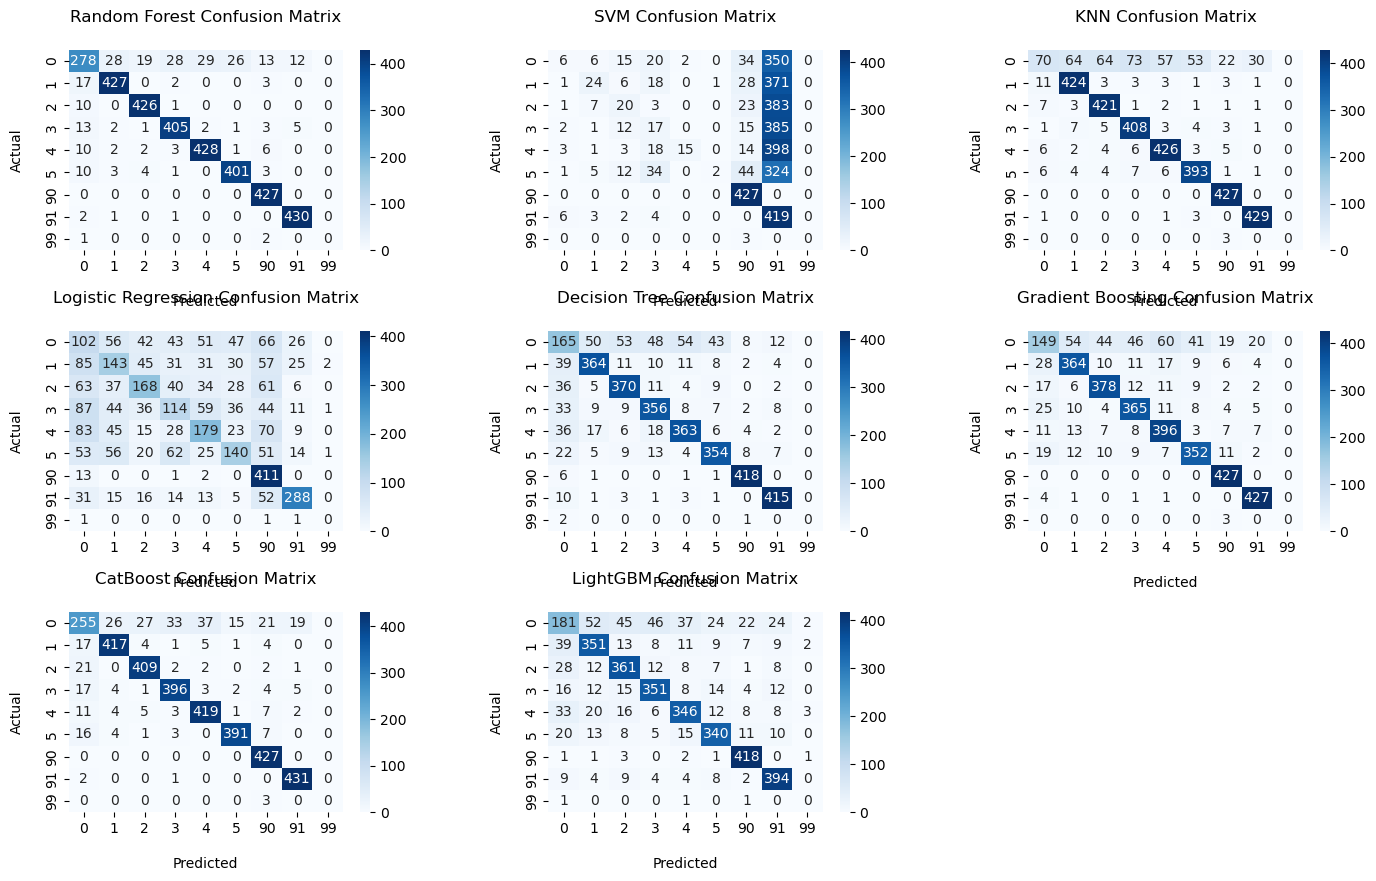

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=77)

models = {
    "Random Forest": RandomForestClassifier(random_state=77),
    "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=77),
    "KNN": KNeighborsClassifier(n_neighbors=6, algorithm='auto'),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=77),
    "Decision Tree": DecisionTreeClassifier(random_state=77),
    "Gradient Boosting": GradientBoostingClassifier(random_state=77),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=77),
    "LightGBM": LGBMClassifier(random_state=77)
}

results = {}
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:",classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"{name} Confusion Matrix", pad=20)
    plt.xlabel("Predicted", labelpad=15)
    plt.ylabel("Actual", labelpad=15)

plt.tight_layout(pad=5.0)
plt.subplots_adjust(hspace=0.4, wspace=0.4)




c:\Conda\envs\myenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:23:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9283
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       433
           1       0.94      0.94      0.94       449
           2       0.96      0.96      0.96       437
           3       0.94      0.93      0.93       432
           4       0.94      0.95      0.95       452
           5       0.94      0.94      0.94       422
          90       0.95      1.00      0.97       427
          91       0.98      0.99      0.98       434
          99       0.00      0.00      0.00         3

    accuracy                           0.93      3489
   macro avg       0.82      0.83      0.82      3489
weighted avg       0.93      0.93      0.93      3489



c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


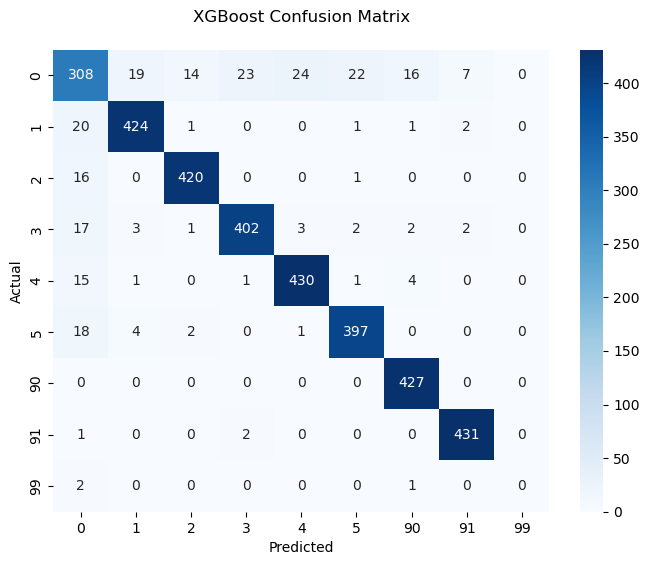

In [43]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


le = LabelEncoder()
y_transformed = le.fit_transform(y_train) 


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=77)
xgb_model.fit(X_train, y_transformed)

y_pred_transformed = xgb_model.predict(X_test)
y_pred_original = le.inverse_transform(y_pred_transformed)

accuracy = accuracy_score(y_test, y_pred_original)
print(f"XGBoost Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_original))

cm = confusion_matrix(y_test, y_pred_original)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("XGBoost Confusion Matrix", pad=20)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [44]:
results

{'Random Forest': 0.9234737747205503,
 'SVM': 0.26655202063628547,
 'KNN': 0.8592719977070794,
 'Logistic Regression': 0.44282029234737746,
 'Decision Tree': 0.8039552880481513,
 'Gradient Boosting': 0.8191458870736601,
 'CatBoost': 0.9014044138721696,
 'LightGBM': 0.7858985382631126}

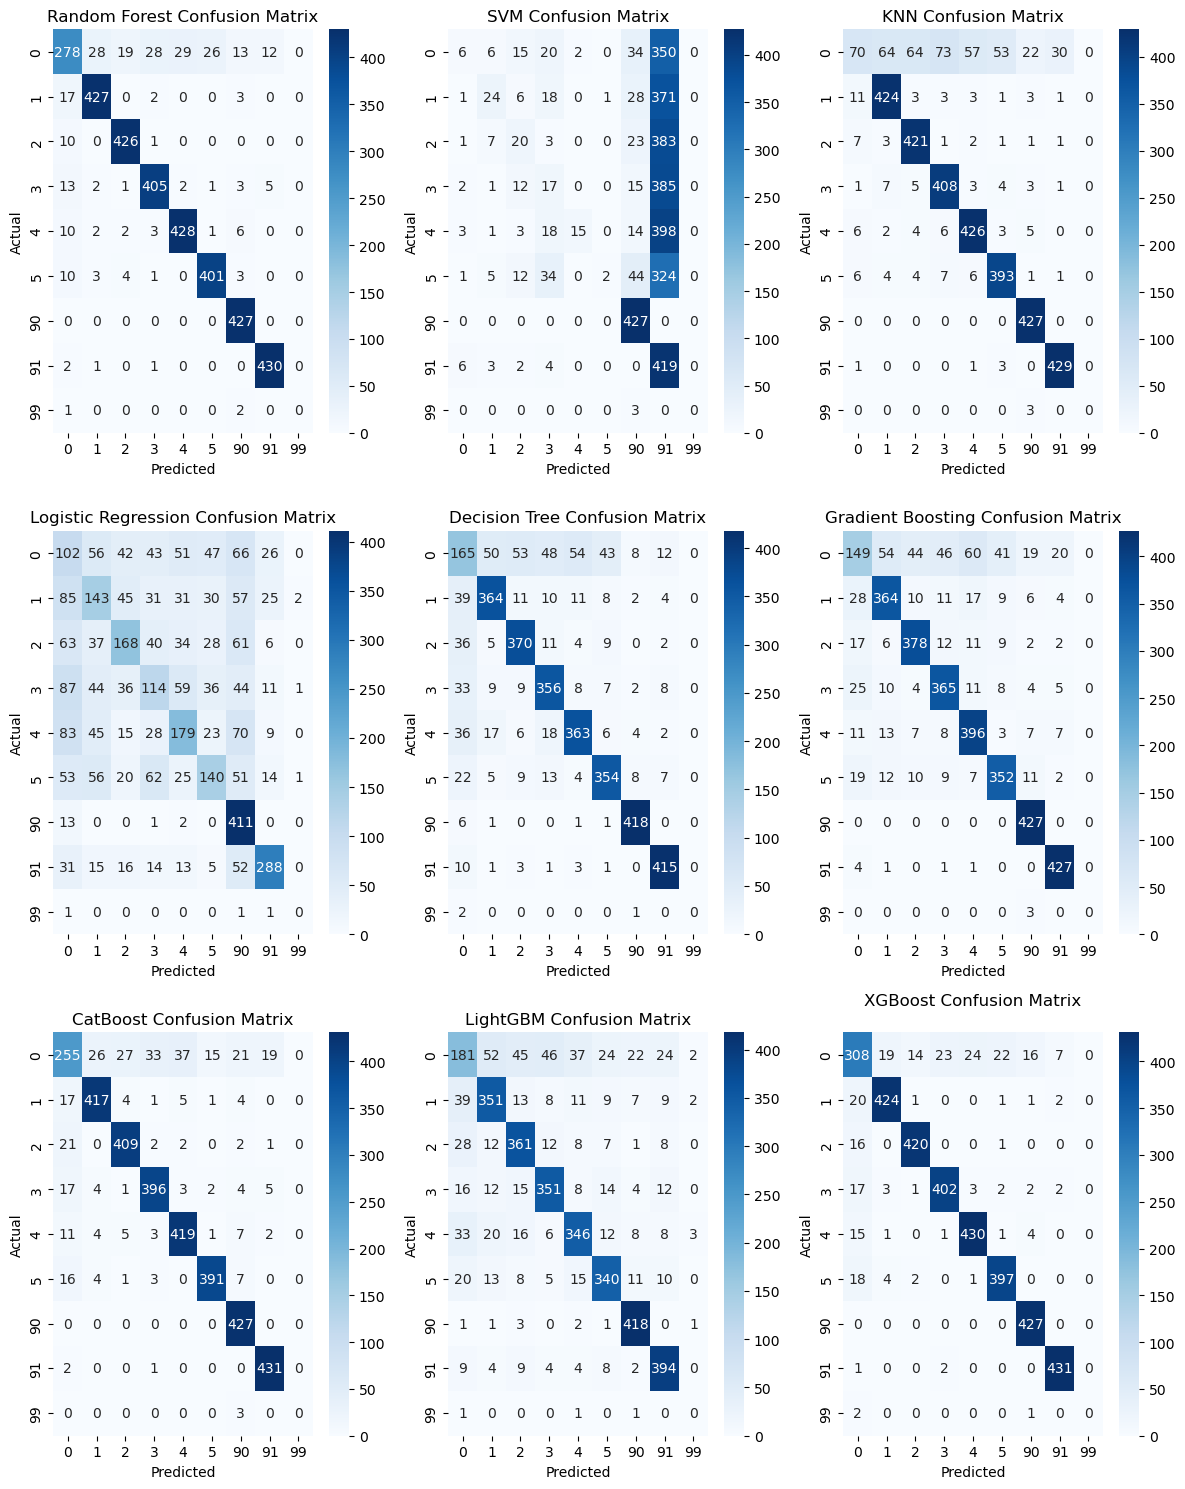

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [ ]:
plt.figure(figsize=(12, 15))
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")


cm = confusion_matrix(y_test, y_pred_original)
plt.subplot(3, 3, 9)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("XGBoost Confusion Matrix", pad=20)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
